# Module 1
Cryptography applications:
- communications
- files
- media

> eavesdropping -- secretly listen to a conversation\
> tampering -- modify the communication data to make it harmful for consumer

### SSL/TLS
1. handshake -- establish shared secret keys (DH key exchange for example). Done by public key cryptography
2. record layer -- the key is established. Now all data is encrypted. Done by private key cryprography

> Q: is public key cryptography always asymmetric? And is private key cryptography always symmetric?
----------------

Keys lifetime:
1. one time key. Used to encrypt only one message. For example, used in email
2. many time key. Persistent key used to encrypt many messages. For example, files encryption

Cryptography is useless in social engineering attacks
> Q: how to solve social engineering attacks?

Also cryptography is applied for:
- digital signature (hashes signed via RSA and etc)
- anonymous communication (mix nex, idk what that means)
- cryptocurrencies (anonymous digital cash)
    anonymous digital cash has problems with double spending and its fixed via cryptocurrencies
- election
    crypto helps anonymous voting. the information who vote is anon, but the total result of voting is known.
    Also known as secure multi-party computation (elections and auctions)
- crypto magic
    privately outsourcing computations: 
        you can send encrypted query to google and google can send you the encrypted result without ever decrypting your query. So basically searching using encrypted query.
        In other words there is a method to compute something based on encrypted data without ever decrypting it and without knowing what's inside that data
    zero knowledge:
        Alice knows N = p * q. Bob knows just N. Alice can proof to Bob that she known that p and q without ever exposing them
    
3 steps of problem solving in cryptography:
1. understand the threat
2. propose a solution
3. the solution should have an underlying hard problem which will be attacked in threat mode

Worst attack on a ciper is "cipher text only attack"!

> Q: how to break rotor machine ciphers?

In [1]:
def genU(N):
    return [i for i in range(1 << N)]

# always in [0, 1]
def probOfU(U, x):
    return 1 / len(U)

# sum of prob of whole U = 1
U = genU(4)
assert(sum([probOfU(U, x) for x in U]) == 1)

# A is an Event
def genA(U, i, j):
    return U[i:j]

def probOfA(A, U):
    return sum([probOfU(U, x) for x in A])


### XOR
> lecturer states that Z = X ^ Y is uniformly distributed even if X is not uniformly distributed but Y is uniformly distributed

That means that if X is always the same value (or P(U, x) = 1 and all other P(U, not_x) = 0), then X ^ Y is still random:

In [5]:
N = 4
X0 = [0b1111 for i in range(1 << N)]
X1 = [0b1111 if i % 2 == 0 else 0b1101 for i in range(1 << N)]
Y = genU(N)
Z0 = [x ^ y for x, y in zip(X0, Y)]
Z1 = [x ^ y for x, y in zip(X1, Y)]
print(Z0)
print(Z1)

[15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[15, 12, 13, 14, 11, 8, 9, 10, 7, 4, 5, 6, 3, 0, 1, 2]


Want to understand it deeper. Why uniform distribution has a prioority in XOR operator?

XOR approaches maximuly uniform distribution no matter what?

In [16]:
X0 = [0b1111 if i % 2 == 0 else 0b1101 for i in range(1 << N)]

X1_x = [0, 1, 2, 3, 4, 5]
X1 = [X1_x[i % len(X1_x)] for i in range(1 << N)]

Z = [x ^ y for x, y in zip(X0, X1)]

probs = {}
for z in Z:
    probs[z] = probs.get(z, 0) + 1
print(probs)

{15: 3, 12: 3, 13: 3, 14: 3, 11: 2, 8: 2}


### The birthday paradox

you got a U that has uniformly distributed elements:

In [52]:
U = [day for day in range(1, 366)]

If you make n = 1.2 * sqrt(len(U)) random samples from U, then there is >= 0.5 probability that there is identical element in that n-samples set:

In [68]:
from math import *
from random import *
n = ceil(1.2 * sqrt(len(U)))

total_count = 100000
got_duplicates_count = 0
for i in range(total_count):
    A = []
    for i in range(n):
        A.append(U[randint(0, len(U) - 1)])

    got_duplicates_count += (len(A) > len(set(A)))

print(f"probability of duplicates = {got_duplicates_count / total_count}")

probability of duplicates = 0.50979


### OTP (One Time Pad)

In OTP key length is equal to message length and encryption is just:

M ^ K = C

In [ ]:
M = 0b10101010101010
K = 0b01010101010101
C = M ^ K
print(bin((M ^ K) ^ M))

# its also useful to implement a swap without tmp veriable:
a = 123
b = 456

a = a ^ b
b = a ^ b # (a ^ b) ^ b = a
a = a ^ b # (a ^ b) ^ a = b

assert(a == 456 and b == 123)

0b1010101010101


> Q: OTP is claimed useless, but isn't it actually useful since all TCP packets has fixed length?

#### Perfect secrecy

```raw
Def: a cipher (E, D) over (K, M, C) has perfect secrecy if:
for any m0 and m1 from M where len(m0) == len(m1)
and for any c from C
and for any uniformly random k from K
Pr(E(k, m0) == c) == Pr(E(k, m1) == c)
```

Or in other words, knowing c (cipher text) gives you no information about m (plain text) since distribution of M knowing c is still uniform.

Given c you can't tell that its rather m0 or m1

**Cipher Text only attacks is impossible of perfect secrecy cipher!!**

And if you got only cipher text and this ciper is perfectly secret then you can only **brutforce** the decryption

#### Proof that OTP has perfect secrecy
OTP_E(K, M) = K ^ M = C

Pr(OTP_E(k, m) == c) := number of such keys / total number of keys

how many such keys for OTP?

Since OTP_E = XOR

Then there is only one K such that K ^ M = C\
because K = C ^ M

And so Pr(OTP_E(k, m) == c) := 1 / total number of keys for any key k

So its uniform distribution and it conforms to prefect secrect

But perfect secrecy means that key length can't be smaller then message length:\
len(k) >= len(m)

### Stream ciphers and Pseudo random generatos

#### Linear cong. gen.
``` raw
r[0] = seed
r[i] = (a * r[i] + b) % p
a,b : integers
p : prime
```

> Q: this rng claimed to be predictable. How to predict its values?

#### Stream cipher implementation

In [7]:
class lcg:
    def __init__(self, seed, a, b, p):
        self.seed = seed
        self.a = a
        self.b = b
        self.p = p

    def random(self):
        value = (self.a * self.seed + self.b) % self.p
        self.seed = value
        return value

def stream_cipher_encrypt(ptext, key):
    l = lcg(key, 8432761, 6539192378, 696729599)
    ctext = []
    for c in ptext:
        ctext.append(ord(c) ^ (l.random() & 0xFF))
    return ctext

def stream_cipher_decrypt(ctext, key):
    l = lcg(key, 8432761, 6539192378, 696729599)
    ptext = []
    for c in ctext:
        ptext.append(chr(c ^ (l.random() & 0xFF)))
    return "".join(ptext)

text = "hello world from omsk!"
key = 27321
ctext = stream_cipher_encrypt(text, key)
print("".join([chr(c) for c in ctext]))
ptext = stream_cipher_decrypt(ctext, key)
print(ptext)

ú4OÁ­uªç£Ö @'®õõD
hello world from omsk!


but stream cpiher strongly rely on pseudo random generator. This PRG should be unpredictable meaning.

For example, the PRG is a function: G(key) -> [int].

If G is predicatable, then based on knowing first n outputs from G, we can derive n+1.

Or if we simplify the G, then G is G(key) -> [bit].

If G is predictable, then based on knowing first n bits from G, we can say that **n+1 more probably be 1** rather than 0 (or vise versa).

Meaning that n+1 bit has more probability of being 1 then 0. Meaning Pr(bit_n+1 = 1) = 1/2 + e where e is small epsillon.

But in a truly random sequence the probability of n+1 bit doesn't depend at all on the previous n bits

More mathematically:
```raw
P(n_bit_is_one | last_n_bits) = P(n_bit_is_one) = 1/2

but for predictable prg:
P(n_bit_is_one | last_n_bits) = 1/2 + e

Which means that n_bit depends on the last_n_bits
```

#### Stream cipher attacks

##### Two time pad attack
You cannot use same key twice!

In [8]:
key = 578439
ptext0 = "hello, world"
ctext0 = stream_cipher_encrypt(ptext0, key)

ptext1 = "hello, mir"
ctext1 = stream_cipher_encrypt(ptext1, key)

key_exploited = []
for c0, c1 in zip(ctext0, ctext1):
    # c0 = m0 ^ k
    # c1 = m1 ^ k
    # c0 ^ c1 = (m0 ^ k) ^ (m1 ^ k) = m0 ^ m1
    # Q: given m0 ^ m1 can you restore m0 and m1 (m0 and m1 are english ascii)?
    k = (c0 ^ c1) & 0xFF
    key_exploited.append(k)

print(key_exploited)
print("".join([chr(c) for c in ctext0]))

for i in range(min(len(ctext0), len(key_exploited))):
    print(chr(ctext0[i] ^ key_exploited[i]), end='')

[0, 0, 0, 0, 0, 0, 0, 26, 6, 0]
Ö¬gab.Ö­ó
Ö¬gax(Ö

##### OTP is malleable

It means that attacker don't need to know the key to change the content of the message by changing the ciphertext. Moreover modifications to cipher text are undetected. For example:

In [9]:
text = "TRANSFER $0000100.00 TO ACCOUNT #199"
ctext = stream_cipher_encrypt(text, 123456)

# attacker knows the format of a plain message, its: TRANSFER $<AMOUNT> TO ACCOUNT <ACCOUNT>
amount_start_index = 10
ctext[amount_start_index] ^= 0b1 # ord('0') => ord('1')
ctext[amount_start_index + 1] ^= 0b1

dtext = stream_cipher_decrypt(ctext, 123456)
print(dtext)

TRANSFER $1100100.00 TO ACCOUNT #199


> Q: the solution is shuffling and MAC (Message Authentication Code)?

##### RC4 (stream cipher)

In [20]:
def rc4_encrypt(key, ptext):
    S = [i for i in range(256)]

    j = 0
    for i in range(len(S)):
        j = (j + S[i] + key[i % len(key)]) % len(S)
        S[i], S[j] = S[j], S[i]

    i = 0
    j = 0
    ctext = []
    for p in ptext:
        i = (i + 1) % len(S)
        j = (j + S[i]) % len(S)
        S[i], S[j] = S[j], S[i]
        t = (S[i] + S[j]) % len(S)
        k = S[t]
        ctext.append(ord(p) ^ k)
    return ctext

for i in range(512):
    l = lcg(i, 8432761, 6539192378, 696729599)    
    key = [l.random() for _ in range(10)]
    ptext = "Aotack at dawn"
    ctext = rc4_encrypt(key, ptext)


##### CSS (Stream cipher)
Used for encrypting media such as DVD and etc.

The algorithms is based on LFSR (linear feedback shift register):

In [51]:
def lfsr_gen(seed):
    taps = [16, 14, 13, 11]
    lfsr = seed
    while True:
        bit = 0
        for t in taps:
            bit = bit ^ ((lfsr >> (16 - t)) & 0b1)
        lfsr = (lfsr >> 1) | (bit << 15)
        yield lfsr
        if lfsr == seed or lfsr == 0:
            break

import itertools

print(list(itertools.islice(lfsr_gen(1283), 4096))[4000:])

n = 0
for value in lfsr_gen(1283):
    n += 1
print(n)

[37543, 51539, 58537, 62036, 63786, 31893, 15946, 40741, 53138, 26569, 13284, 6642, 36089, 50812, 58174, 61855, 63695, 64615, 65075, 32537, 16268, 8134, 36835, 18417, 9208, 4604, 35070, 50303, 25151, 12575, 39055, 52295, 26147, 13073, 39304, 52420, 58978, 62257, 31128, 48332, 24166, 12083, 6041, 3020, 1510, 755, 377, 32956, 49246, 24623, 12311, 6155, 3077, 1538, 769, 33152, 16576, 8288, 36912, 51224, 58380, 29190, 47363, 56449, 60992, 30496, 48016, 24008, 44772, 22386, 43961, 54748, 27374, 46455, 55995, 60765, 63150, 64343, 32171, 48853, 24426, 12213, 38874, 52205, 26102, 13051, 39293, 19646, 42591, 54063, 27031, 13515, 6757, 36146, 50841, 25420]
65535


##### eStream Salsa (20)

TODO: implement using sse inllltrinsics or direct instruction call via asm injection

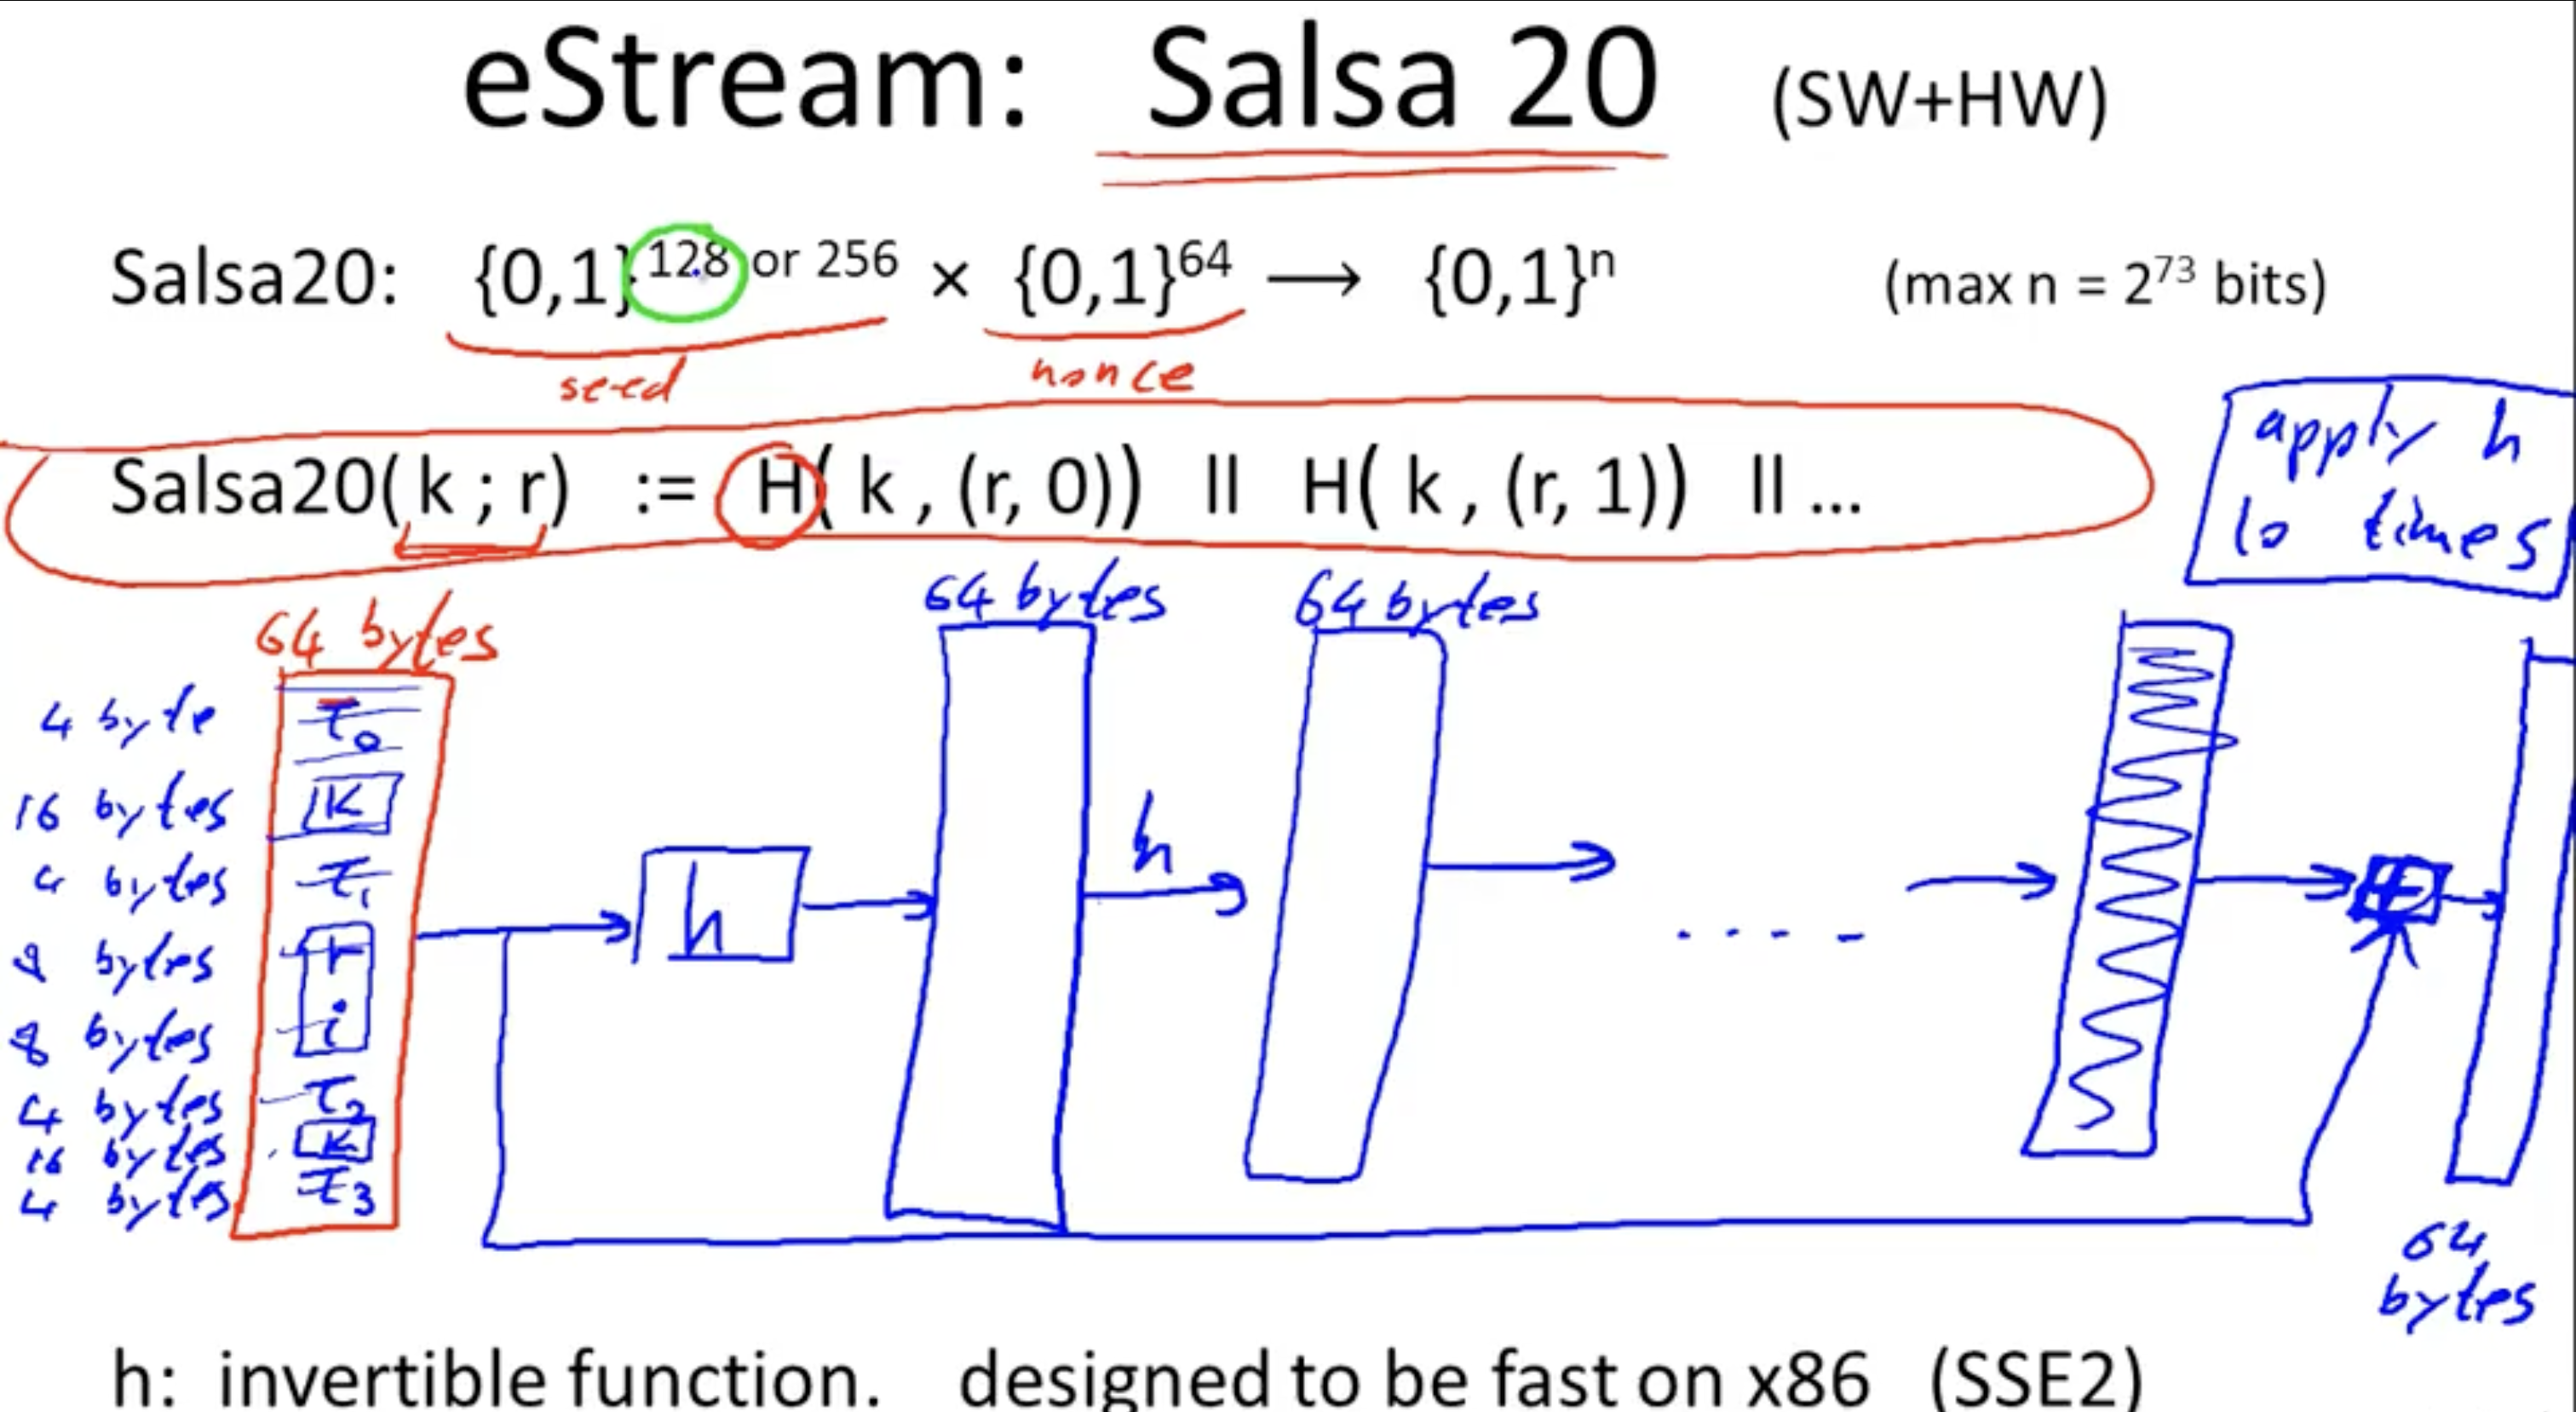

### PRG definition

The PRG is:
G(K) -> {0,1}^n

PRG is a function that takes k from K (key space) and output n-length bit string

The truly random {0,1}^n n-length bit string is the following:

In [3]:
def true_random_bit():
    # returns 1 or 0 with 50% chance
    pass
n = 1024
string = [true_random_bit() for x in range(n)]

such sequence define a set of all {0,1}^n strings and each element of this set is equally possible due to absolute random nature of this string.

the PRG also outputs {0,1}^n strings which forms a set, but this set is much smaller then whole {0,1}^n set because number of elements in PRG output set is equal to number of elements in K (key space)

and by definition len(K) << PRG_n

but we want PRG to be truly random. that means that:
```raw
PRG_{0,1}^n must be indistinguishable from {0,1}^n
```

##### Statistical test
But what is indistinguishable?

Statistical test is an algorithm that takes some input (for example output of PRG) and says if it randoms or not:

In [4]:
def stat_test(xs: list[bool]) -> bool:
    pass

examples of stat tests:

In [1]:
def stat_test_count(xs: list[bool]) -> bool:
    zero_count = 0
    one_count = 0
    for x in xs:
        if x:
            one_count += 1
        else:
            zero_count += 1
    return abs(zero_count - one_count) < 10 * sqrt(len(xs))

##### Advantage
To define if statistical test is good or not.

In [ ]:
def stat_test(xs: list[bool]) -> bool:
    pass

# "real" random number sequence
def real_rand() -> list[bool]:
    pass

def advantage(st, prg) -> float:
    Ks = [] # key space
    prg_prob = 0.0
    for k in Ks:
        prg_prob += 1.0 if st(prg(k)) else 0.0
    prg_prob /= len(Ks)
    # prg_prob is the probability that st is true for that prg for any given key from KeySpace
    rand_prob = 0.0
    N = 1024 # for some big number of iterations -> inf
    for i in range(N): 
        rand_prob += 1.0 if st(real_rand()) else 0.0
    rand_prob /= N
    return abs(prg_prob - rand_prob)


so the advantage is basically difference of the good statistics for prg and good statistics for the real random sequence.

its logical to say that any stat_test (st) will return true for real_rand. otherwise that's bad stat_test.

- if advantage is 1 then statistics for prg is very different then statistics for real_rand
- if advantage is 0 then statistics for prg and real_rand are the same

so for good prg we want advantage -> 0

#### Secure PRG (crypto def)

its said that prg(k) -> list[bool] is secure if:

for any "efficient" stat_test, advantage(eff_stat_test, prg) approaching 0, is 0 or very very close to 0o

**Q**: can we proove for some prg that its secure? The lecturer said that this is P != NP problem and we can't proove security of any prg. Why?\
**A**:

In [5]:
EST = [] # all efficient statistical tests

def is_prg_secure(prg) -> bool:
    eps = 0.0001
    for st in EST:
        if advantage(st, prg) > eps:
            return False
    return True


**BUT IF PRG IS PREDICTABLE THEN ITS NOT SECURE**\
OR\
**IF PRG IS UNPREDICTABLE THEN ITS SECURE**

suppose we have predictable PRG, then there exists algorithm A such that:

In [ ]:
def A(prg, i):
    def pred(first_i: list[bool]) -> bool:
        pass
    # got first i values from prg
    first_i = [prg[x] for x in range(i)]
    i_plus_1_value = pred(first_i) # do some predicting stuff based on first_i
    return i_plus_1_value # Pr(i_plus_1_value == prg[i]) == 1/2 + e where e is not small


Then we can create stat_test B such that:

In [9]:
def B(xs: list[bool]):
    return A(xs, len(xs) - 1) == xs[len(xs) - 1]

So if A does predict ith value of prg, then B is true, otherwise B is false. Then lets check if prg is secure. We know that our PRG is predictable, but is it secure?

Its clearly not because, for predictable PRG, the
```raw
Pr(B(PRG(k)) == 1) == 1/2 + e
```
but for real_rand
```raw
Pr(B(real_rand) == 1) == 1/2
```
take a difference between this Pr and we got e which is negligible and thats opposite of secure deffinition because A is efficient algo and B is efficient stat test

In [4]:
def stat_diff(st, xs, ys) -> float:
    prob_x = 0.0
    prob_y = 0.0
    xys = zip(xs, ys)
    for (x, y) in xys:
        prob_x += 1.0 if st(x) else 0.0
        prob_y += 1.0 if st(y) else 0.0
    prob_x /= len(xys)
    prob_y /= len(xys)
    return abs(prob_x - prob_y)

# p1 and p2 are two distributions over {0,1}^n
def computationaly_indistringuishable(p1, p2) -> bool:
    for st in EST:
        if stat_diff(st, sample(p1), sample(p2)) < 0.0001:
            return False
    return True

### Semantic security

In [ ]:
m0 = 123
m1 = 241

k = 189

c0 = m0 ^ k
c1 = m1 ^ k

def adv(m0, m1, c):
    k0 = m0 ^ c
    k1 = m1 ^ c
    print(k0, k1)
    print(m0, c ^ k1)

adv(m0, m1, c0)

189 55
123 241
